### Import Library and Load the Data

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [80]:
#Loading the dataset
df = pd.read_csv("data.csv")
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 8950


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA

In [81]:
df.columns = [col[0].upper() + col[1:].lower() for col in df.columns]
df = df.drop(columns='Tenure')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cust_id                           8950 non-null   object 
 1   Balance                           8950 non-null   float64
 2   Balance_frequency                 8950 non-null   float64
 3   Purchases                         8950 non-null   float64
 4   Oneoff_purchases                  8950 non-null   float64
 5   Installments_purchases            8950 non-null   float64
 6   Cash_advance                      8950 non-null   float64
 7   Purchases_frequency               8950 non-null   float64
 8   Oneoff_purchases_frequency        8950 non-null   float64
 9   Purchases_installments_frequency  8950 non-null   float64
 10  Cash_advance_frequency            8950 non-null   float64
 11  Cash_advance_trx                  8950 non-null   int64  
 12  Purcha

In [82]:
print("original datapoints:", len(df))
df = df.dropna()
print("valid datapoints:", len(df))

original datapoints: 8950
valid datapoints: 8636


In [83]:
df.describe()

,Balance,Balance_frequency,Purchases,Oneoff_purchases,Installments_purchases,Cash_advance,Purchases_frequency,Oneoff_purchases_frequency,Purchases_installments_frequency,Cash_advance_frequency,Cash_advance_trx,Purchases_trx,Credit_limit,Payments,Minimum_payments,Prc_full_payment
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


### KDE plot

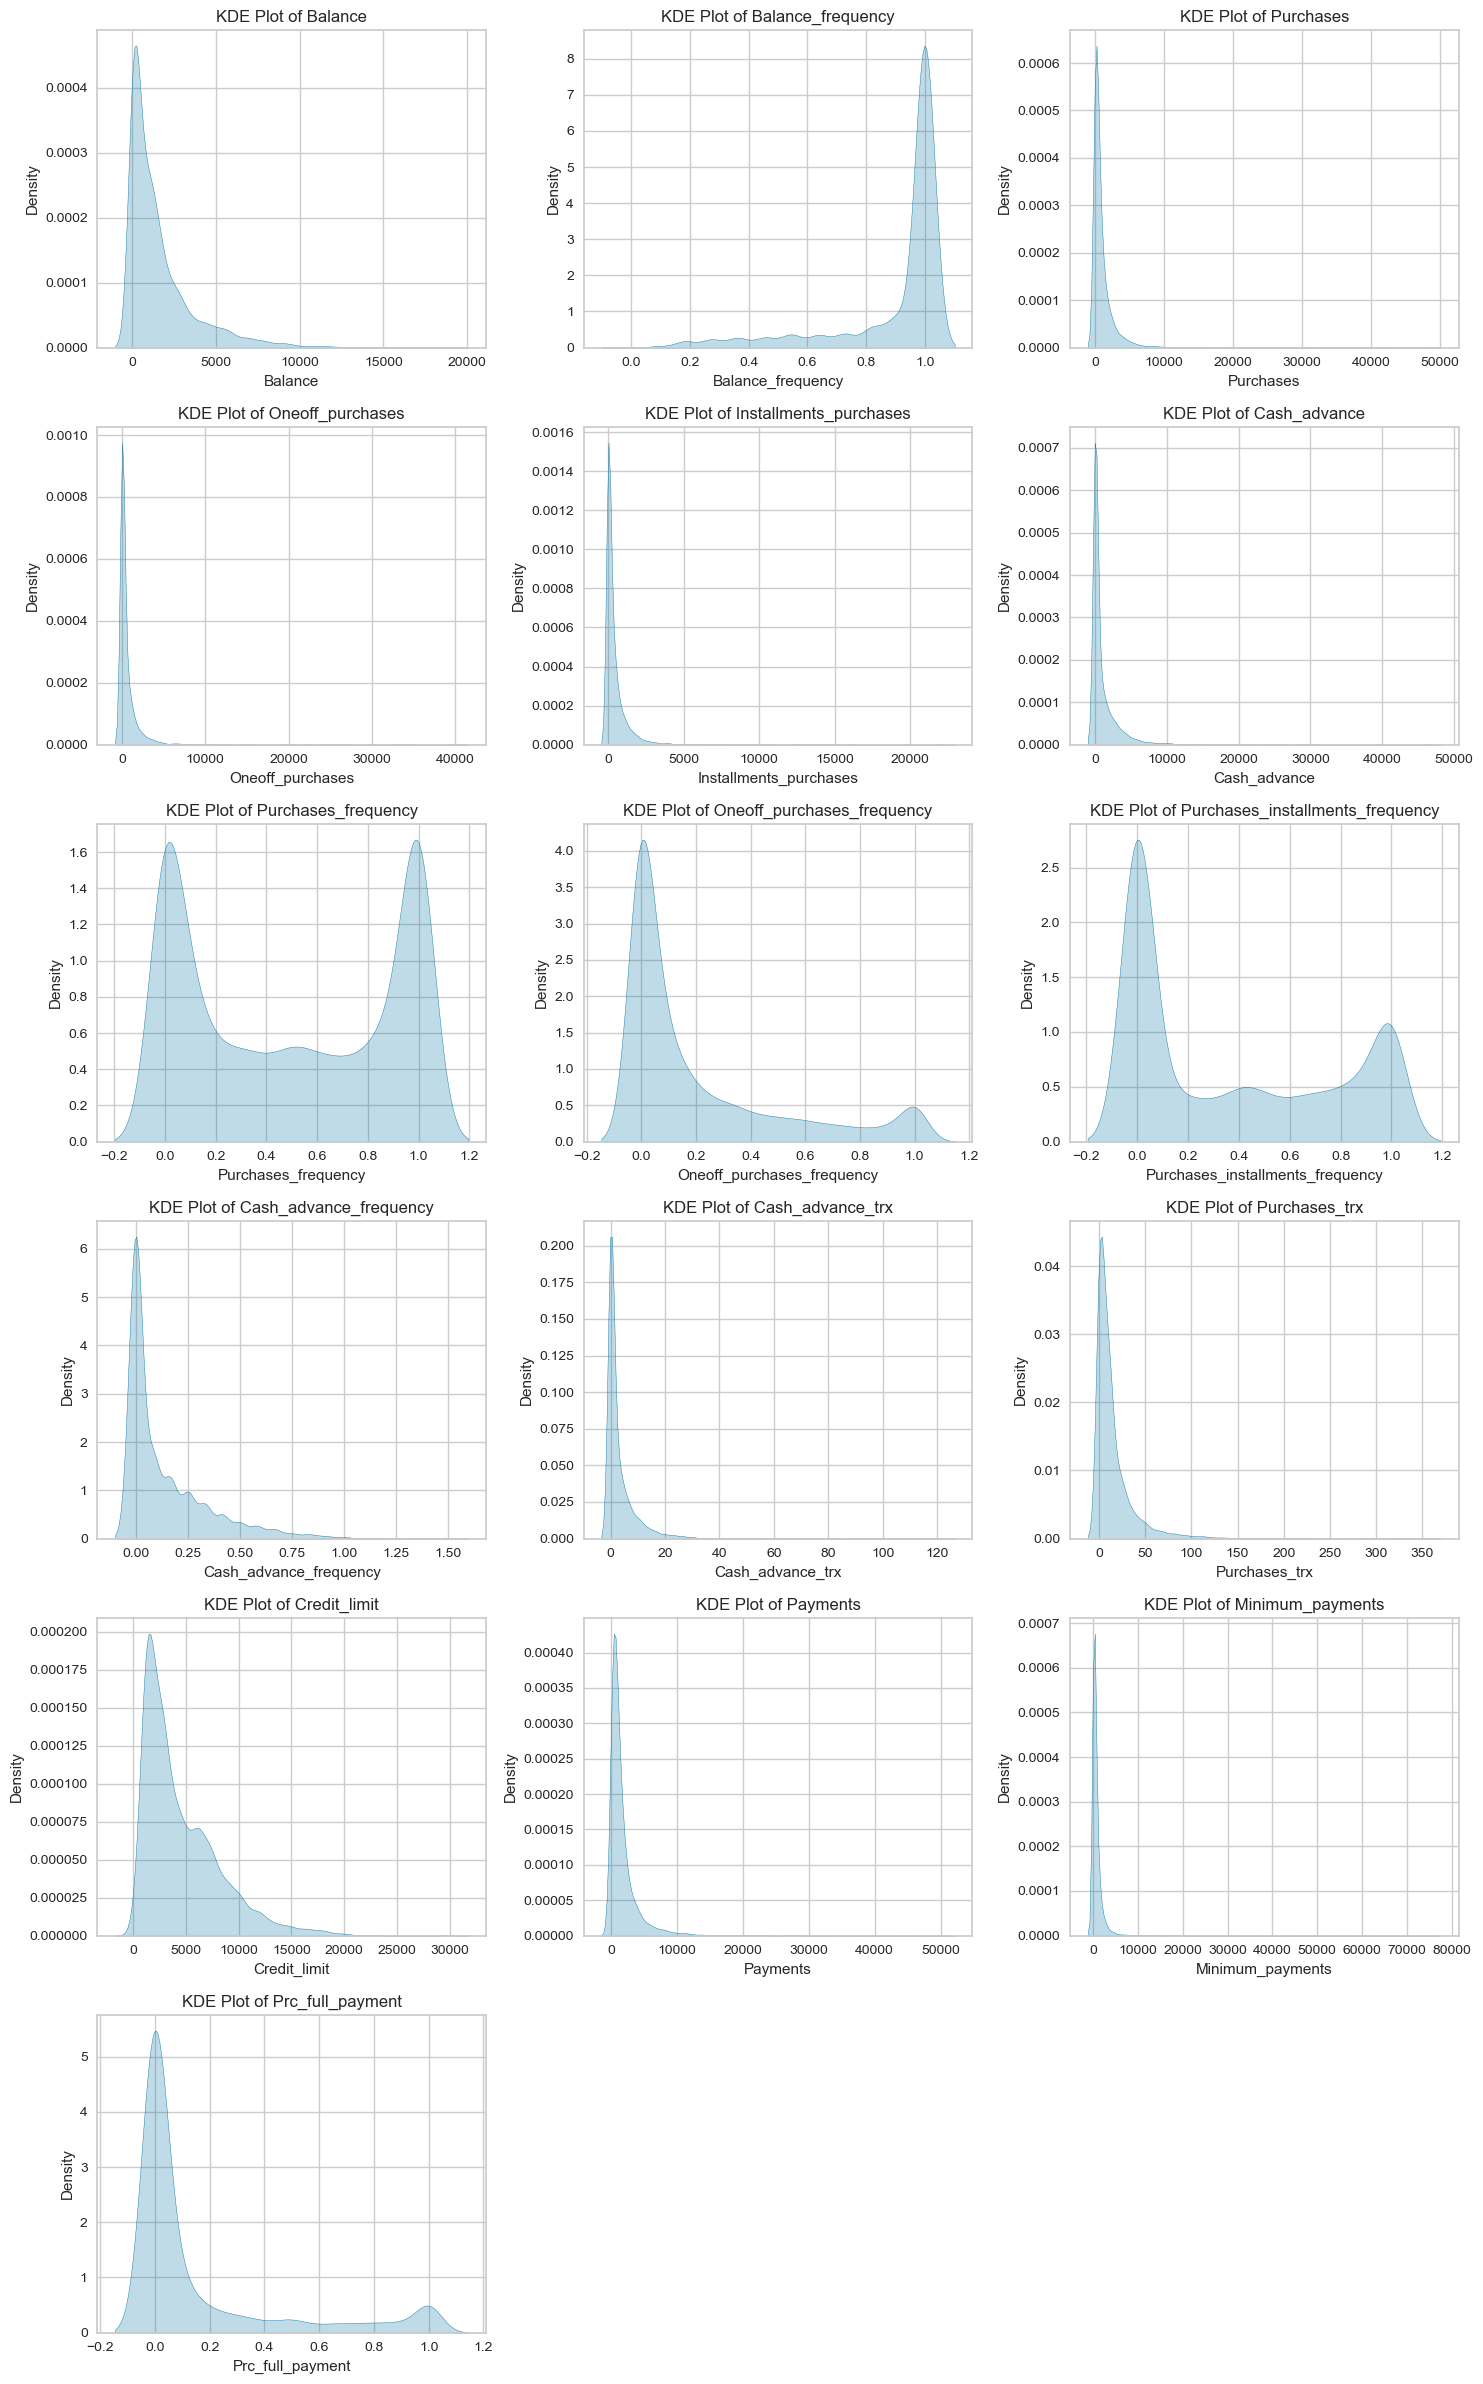

In [84]:
numeric_cols = df.select_dtypes(include=["number"]).columns

num_cols = len(numeric_cols)
num_rows = int(np.ceil(num_cols / 3)) 

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE Plot of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


features are not normal

### Feature Engineering

In [85]:
df['Balance_used_rate'] = df['Balance'] / df['Credit_limit'] 
df['Payment_rate'] = df['Payments'] / (df['Purchases'] + 1)
df['Installments_rate'] = df['Installments_purchases'] / (df['Purchases'] + 1)
df['Cash_advance_rate'] = df['Cash_advance'] / (df['Purchases'] + 1)


### Scale the data

In [86]:
# Creating a copy of data
df_cp = df.copy().drop(columns='Cust_id')

scaler = RobustScaler()  # for skewed data
scaled_df_cp = pd.DataFrame(scaler.fit_transform(df_cp), columns=df_cp.columns)


### PCA

In [113]:
pca = PCA(n_components=5)
pca.fit(scaled_df_cp)
PCA_ds = pd.DataFrame(pca.transform(scaled_df_cp))

explained_variance_ratio = pca.explained_variance_ratio_

print("Variation explained by each PC:", explained_variance_ratio)
print("Cumulative Variantion explained", np.cumsum(explained_variance_ratio))

Variation explained by each PC: [8.58251485e-01 1.37097313e-01 1.50423793e-03 1.16227689e-03
 5.16521742e-04 3.95746595e-04 3.22429793e-04 2.32088715e-04
 1.22626524e-04 9.77669033e-05]
Cumulative Variantion explained [0.85825149 0.9953488  0.99685304 0.99801531 0.99853183 0.99892758
 0.99925001 0.9994821  0.99960473 0.99970249]


Use T-SNE to reduce number of features for non-linearity.

In [114]:
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(PCA_ds.iloc[:, :5]) 

# Clustering

Elbow Method to determine the number of clusters to be formed:


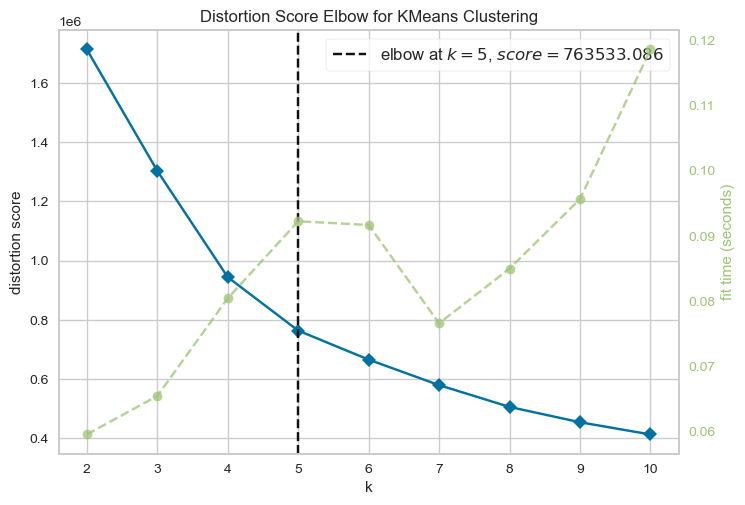

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(tsne_results)
Elbow_M.show()

In [138]:
kmeans = KMeans(# n_clusters=3, 
                n_clusters=Elbow_M.elbow_value_, 
                random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(tsne_results)

df["Clusters"] = kmeans_labels


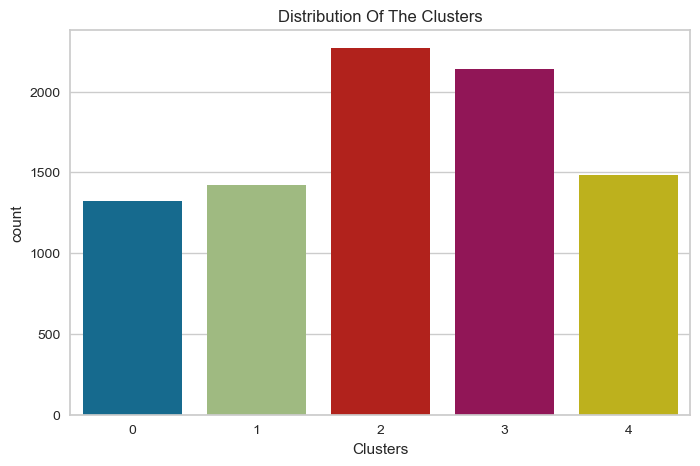

In [139]:
plt.figure(figsize=(8, 5))
pl = sns.countplot(
    data=df, 
    x="Clusters",
    # order=cluster_order,
    # palette=cluster_palette
)
pl.set_title("Distribution Of The Clusters")
plt.show()


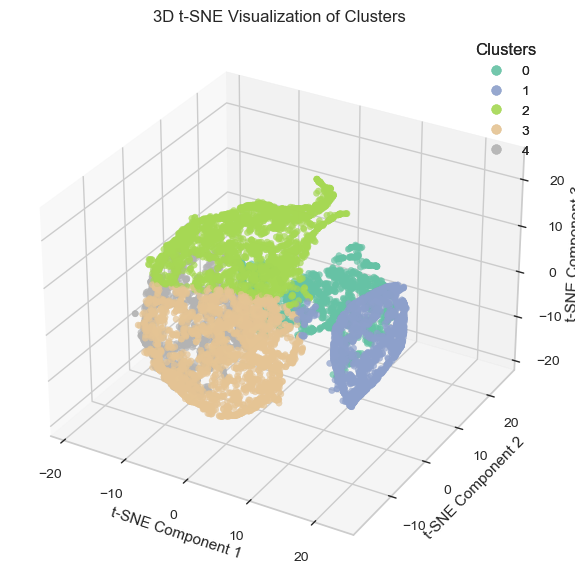

In [140]:
# extract first 3 t sne components
tsne_3D = tsne_results[:, :3]
clusters = df["Clusters"]

# plot 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(tsne_3D[:, 0], tsne_3D[:, 1], tsne_3D[:, 2],
                     c=clusters, cmap="Set2", alpha=0.7)

ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
ax.set_title("3D t-SNE Visualization of Clusters")

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


Store the summary table.

In [141]:
numeric_columns = df.select_dtypes(include="number").columns.delete(-1)

cluster_mean = df.groupby('Clusters')[numeric_columns].mean()
cluster_median = df.groupby('Clusters')[numeric_columns].median()

cluster_mean.to_csv('cluster_mean.csv')
cluster_median.to_csv('cluster_median.csv')

In [142]:
cluster_mean

,Balance,Balance_frequency,Purchases,Oneoff_purchases,Installments_purchases,Cash_advance,Purchases_frequency,Oneoff_purchases_frequency,Purchases_installments_frequency,Cash_advance_frequency,Cash_advance_trx,Purchases_trx,Credit_limit,Payments,Minimum_payments,Prc_full_payment,Balance_used_rate,Payment_rate,Installments_rate,Cash_advance_rate
Clusters,,,,,,,,,,,,,,,,,,,,
0,604.850487,0.626236,232.336086,120.646465,112.260568,199.480800,0.193167,0.046981,0.141522,0.092077,1.502650,3.141559,3154.840265,787.708006,339.599819,0.197337,0.311084,191.101788,0.334276,136.734574
1,2635.111448,0.896711,1.431716,0.922117,0.556681,2792.624775,0.004663,0.002026,0.002383,0.313505,7.889592,0.052743,4902.965307,2293.904090,1110.227652,0.054946,0.554829,2207.406072,0.058509,2667.337681
2,2865.719284,0.984597,2864.634407,1830.736188,1034.184249,1449.704672,0.787623,0.470280,0.586001,0.167881,4.797708,37.358308,6670.948355,3547.222763,1830.619559,0.157959,0.479617,3.418747,0.404434,3.190098
3,1175.845057,0.993575,447.532125,225.210785,222.833942,419.875450,0.551393,0.172314,0.398262,0.097964,1.865950,9.964503,3270.317609,808.974318,479.536332,0.021647,0.483864,3.866301,0.498212,2.078520
4,176.831342,0.853573,734.102036,288.015435,446.166831,109.737028,0.710723,0.186982,0.547861,0.020397,0.360081,13.150371,3894.191272,895.210052,172.905826,0.426281,0.074589,1.671983,0.642436,0.400826


In [143]:
cluster_median

,Balance,Balance_frequency,Purchases,Oneoff_purchases,Installments_purchases,Cash_advance,Purchases_frequency,Oneoff_purchases_frequency,Purchases_installments_frequency,Cash_advance_frequency,Cash_advance_trx,Purchases_trx,Credit_limit,Payments,Minimum_payments,Prc_full_payment,Balance_used_rate,Payment_rate,Installments_rate,Cash_advance_rate
Clusters,,,,,,,,,,,,,,,,,,,,
0,82.784219,0.545455,45.65,0.00,0.00,0.000000,0.083333,0.000000,0.000000,0.00,0.0,1.0,2283.333333,430.136625,161.234787,0.000,0.030374,8.092078,0.000000,0.000000
1,1900.831798,1.000000,0.00,0.00,0.00,1976.169218,0.000000,0.000000,0.000000,0.25,5.0,0.0,4000.000000,1316.117747,594.892542,0.000,0.558818,1274.888742,0.000000,1869.350939
2,1979.782537,1.000000,2018.13,1164.35,588.65,0.000000,0.916667,0.416667,0.666667,0.00,0.0,27.0,6000.000000,2288.300302,864.068895,0.000,0.439413,1.029470,0.336849,0.000000
3,995.323626,1.000000,365.90,103.00,123.06,0.000000,0.500000,0.083333,0.333333,0.00,0.0,8.0,2500.000000,587.710246,359.989055,0.000,0.431733,1.605065,0.487190,0.000000
4,79.222393,0.909091,574.75,44.99,300.00,0.000000,0.833333,0.083333,0.636364,0.00,0.0,11.0,3000.000000,617.678129,155.549069,0.375,0.025947,1.007028,0.918014,0.000000


# Visualization

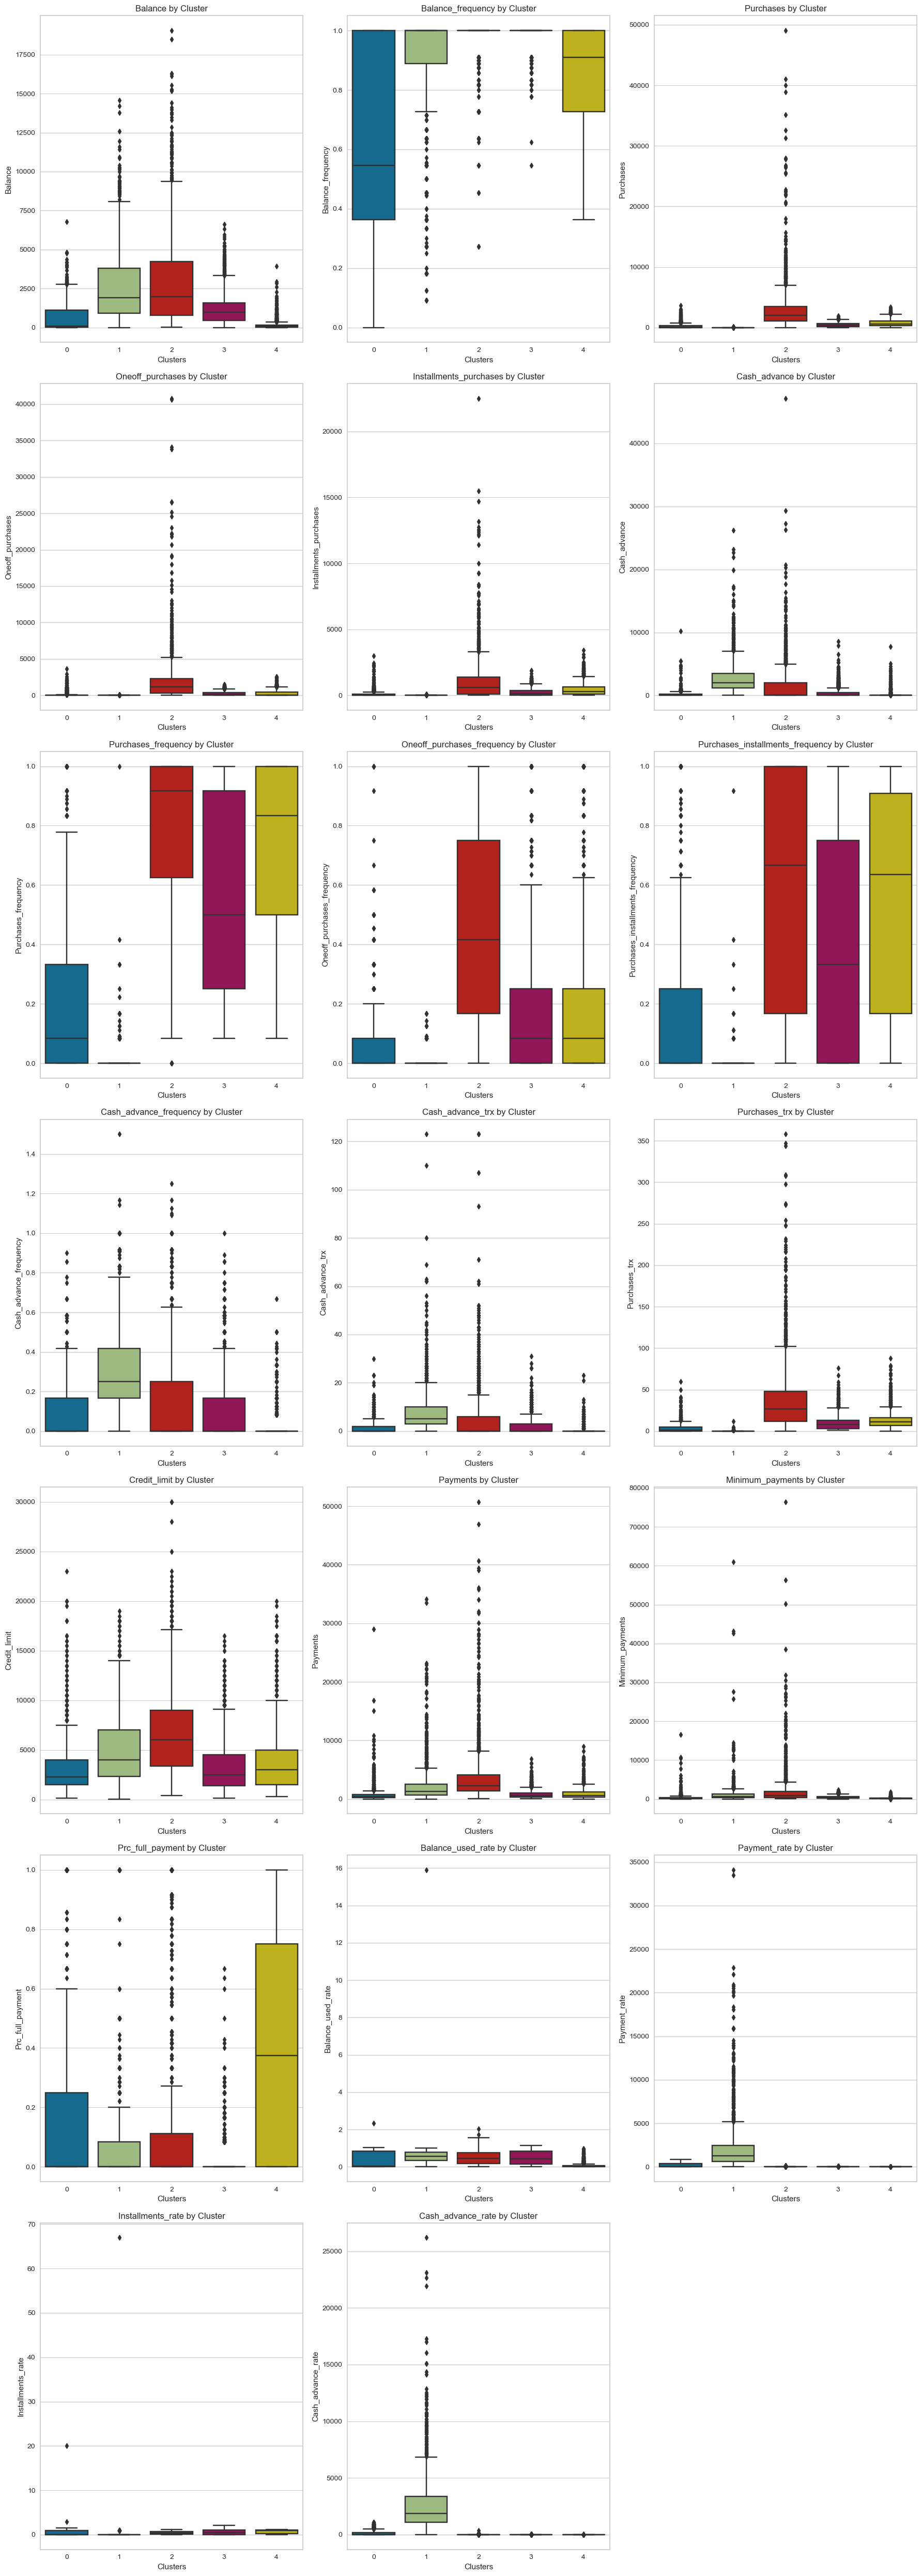

In [144]:
num_vars = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(18, num_vars * 2.5))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x="Clusters", y=col, data=df, 
                # order=cluster_order, palette=cluster_palette, 
                ax=axes[i])
    axes[i].set_title(f"{col} by Cluster")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


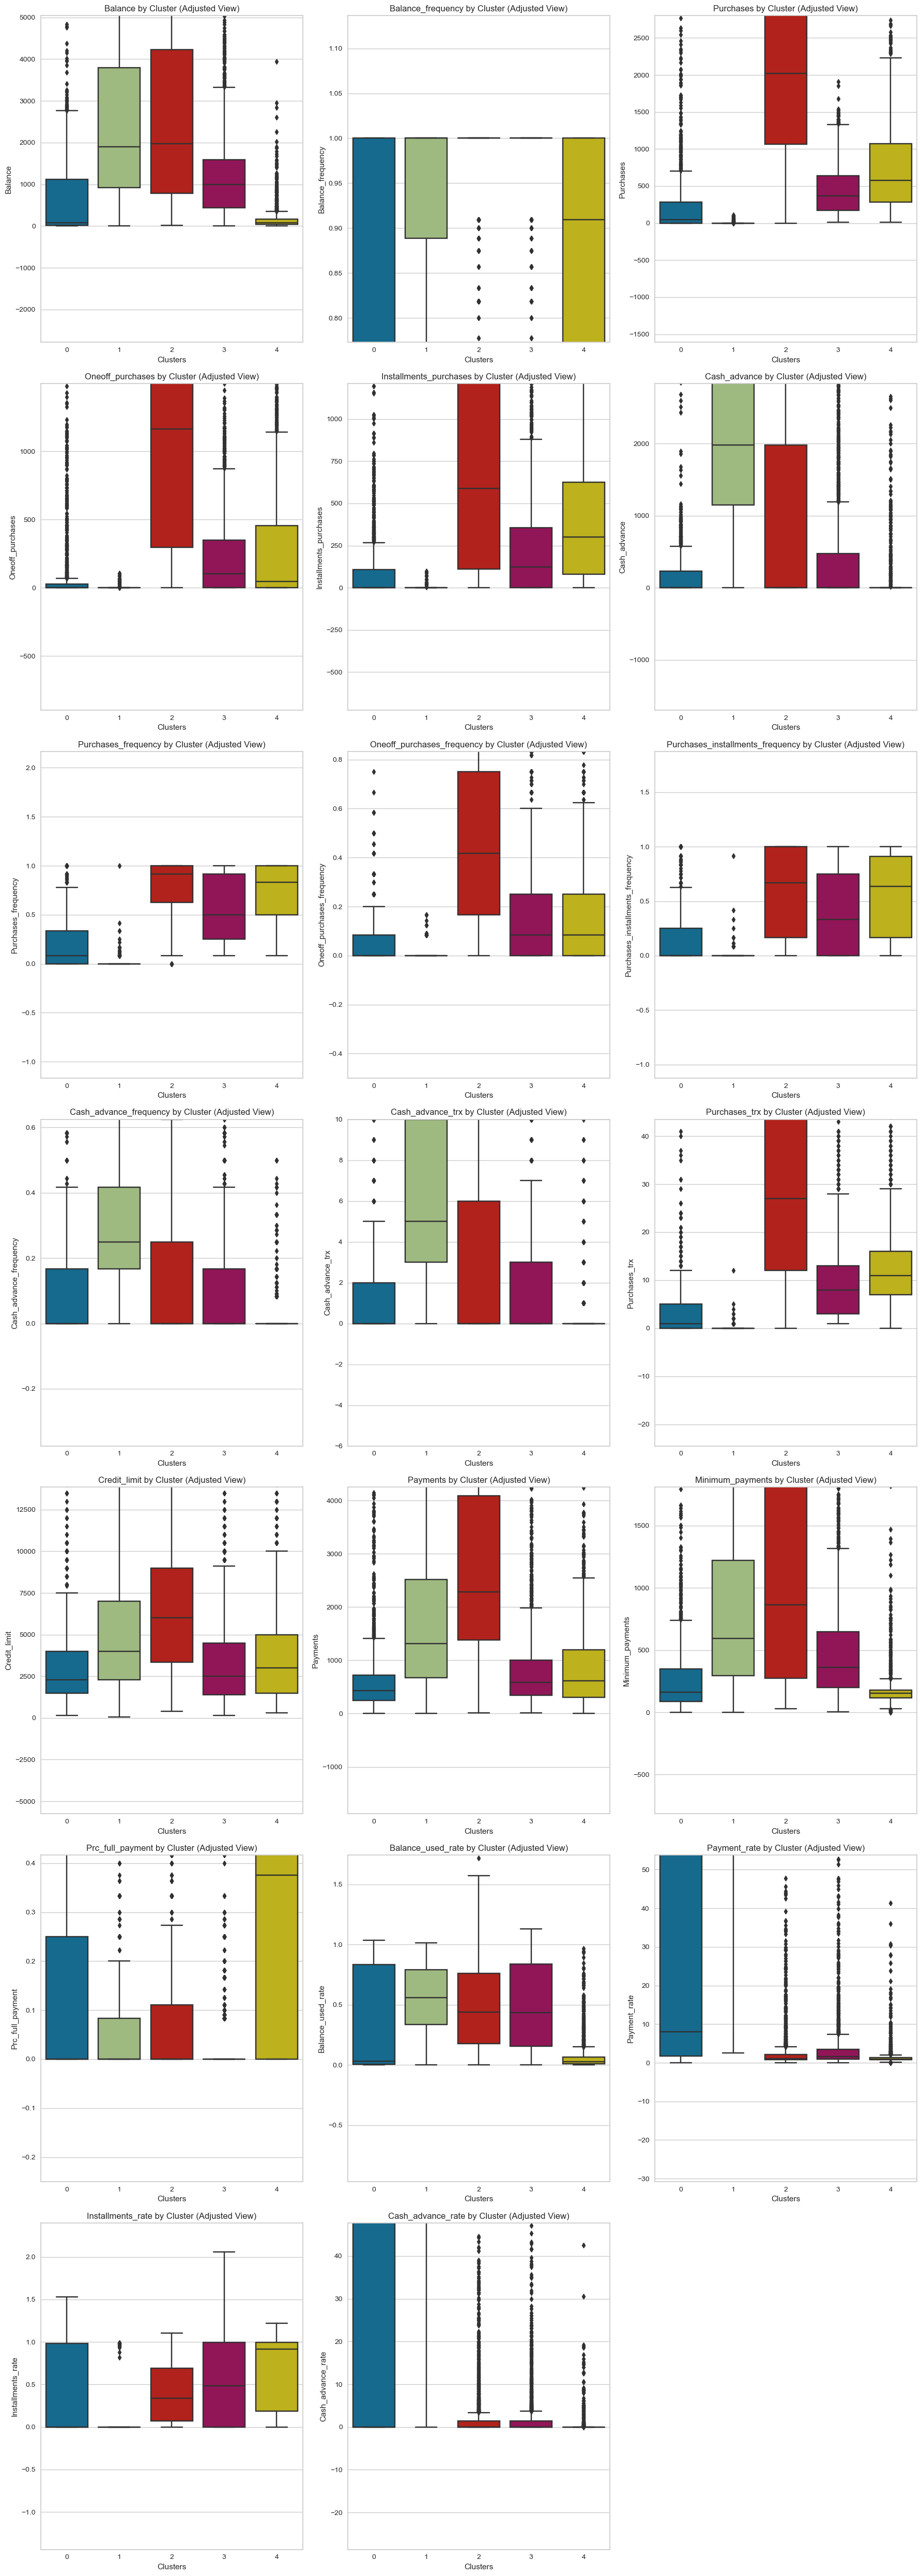

In [145]:
num_vars = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(18, num_vars * 2.5))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x="Clusters", y=col, data=df, ax=axes[i])

    # calculate iqr to adjust the view
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 
    axes[i].set_ylim(lower_bound, upper_bound)

    axes[i].set_title(f"{col} by Cluster (Adjusted View)")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

You need to read the boxplots and cluster summary table to give description of each cluster. This is `very important`.

# Try Supervised Models on Clusters

## Random Forest

In [146]:
X = df.select_dtypes(include=["number"]).drop(columns=["Clusters"])  # Features
y = df["Clusters"]  # Target variable

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")


Training size: (6045, 20), Test size: (2591, 20)


In [147]:
# Initialize the random forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

Random Forest Accuracy: 0.9657
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       396
           1       0.98      0.98      0.98       427
           2       0.95      0.97      0.96       681
           3       0.97      0.97      0.97       642
           4       0.97      0.95      0.96       445

    accuracy                           0.97      2591
   macro avg       0.97      0.96      0.97      2591
weighted avg       0.97      0.97      0.97      2591



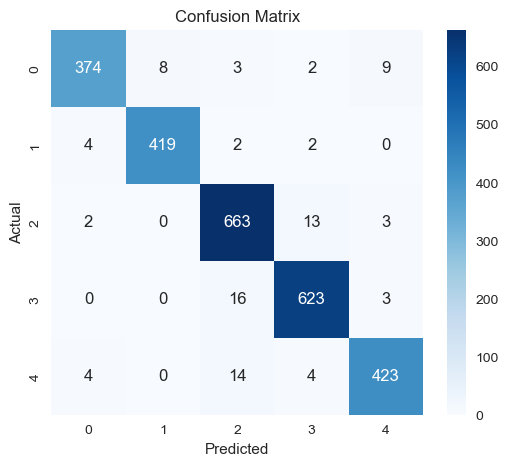

In [148]:
# predict the test set
y_pred = rf_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


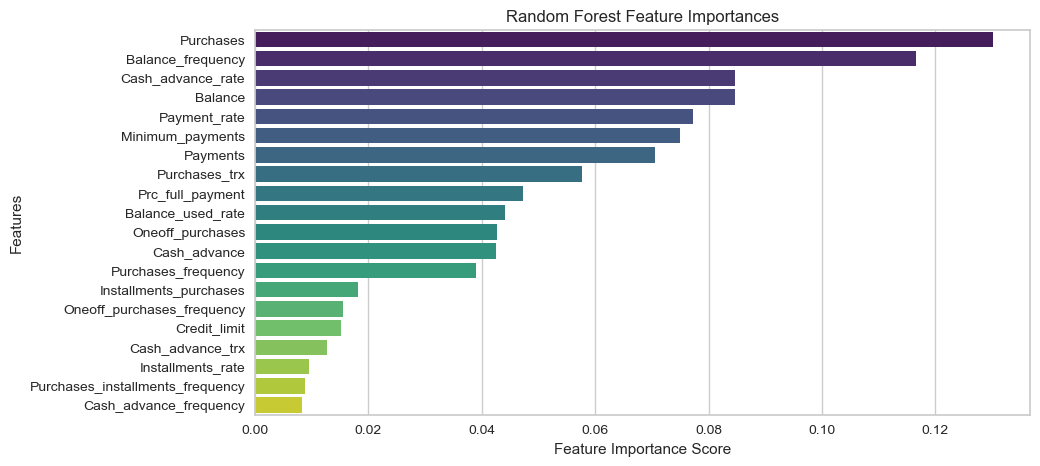

In [149]:
# check feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.show()
